# 演習問題9.1

パッケージの読み込み

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop
from keras.utils import np_utils

C:\Users\araki\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


fasion MNISTデータの読み込み

In [2]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

画像データの表示

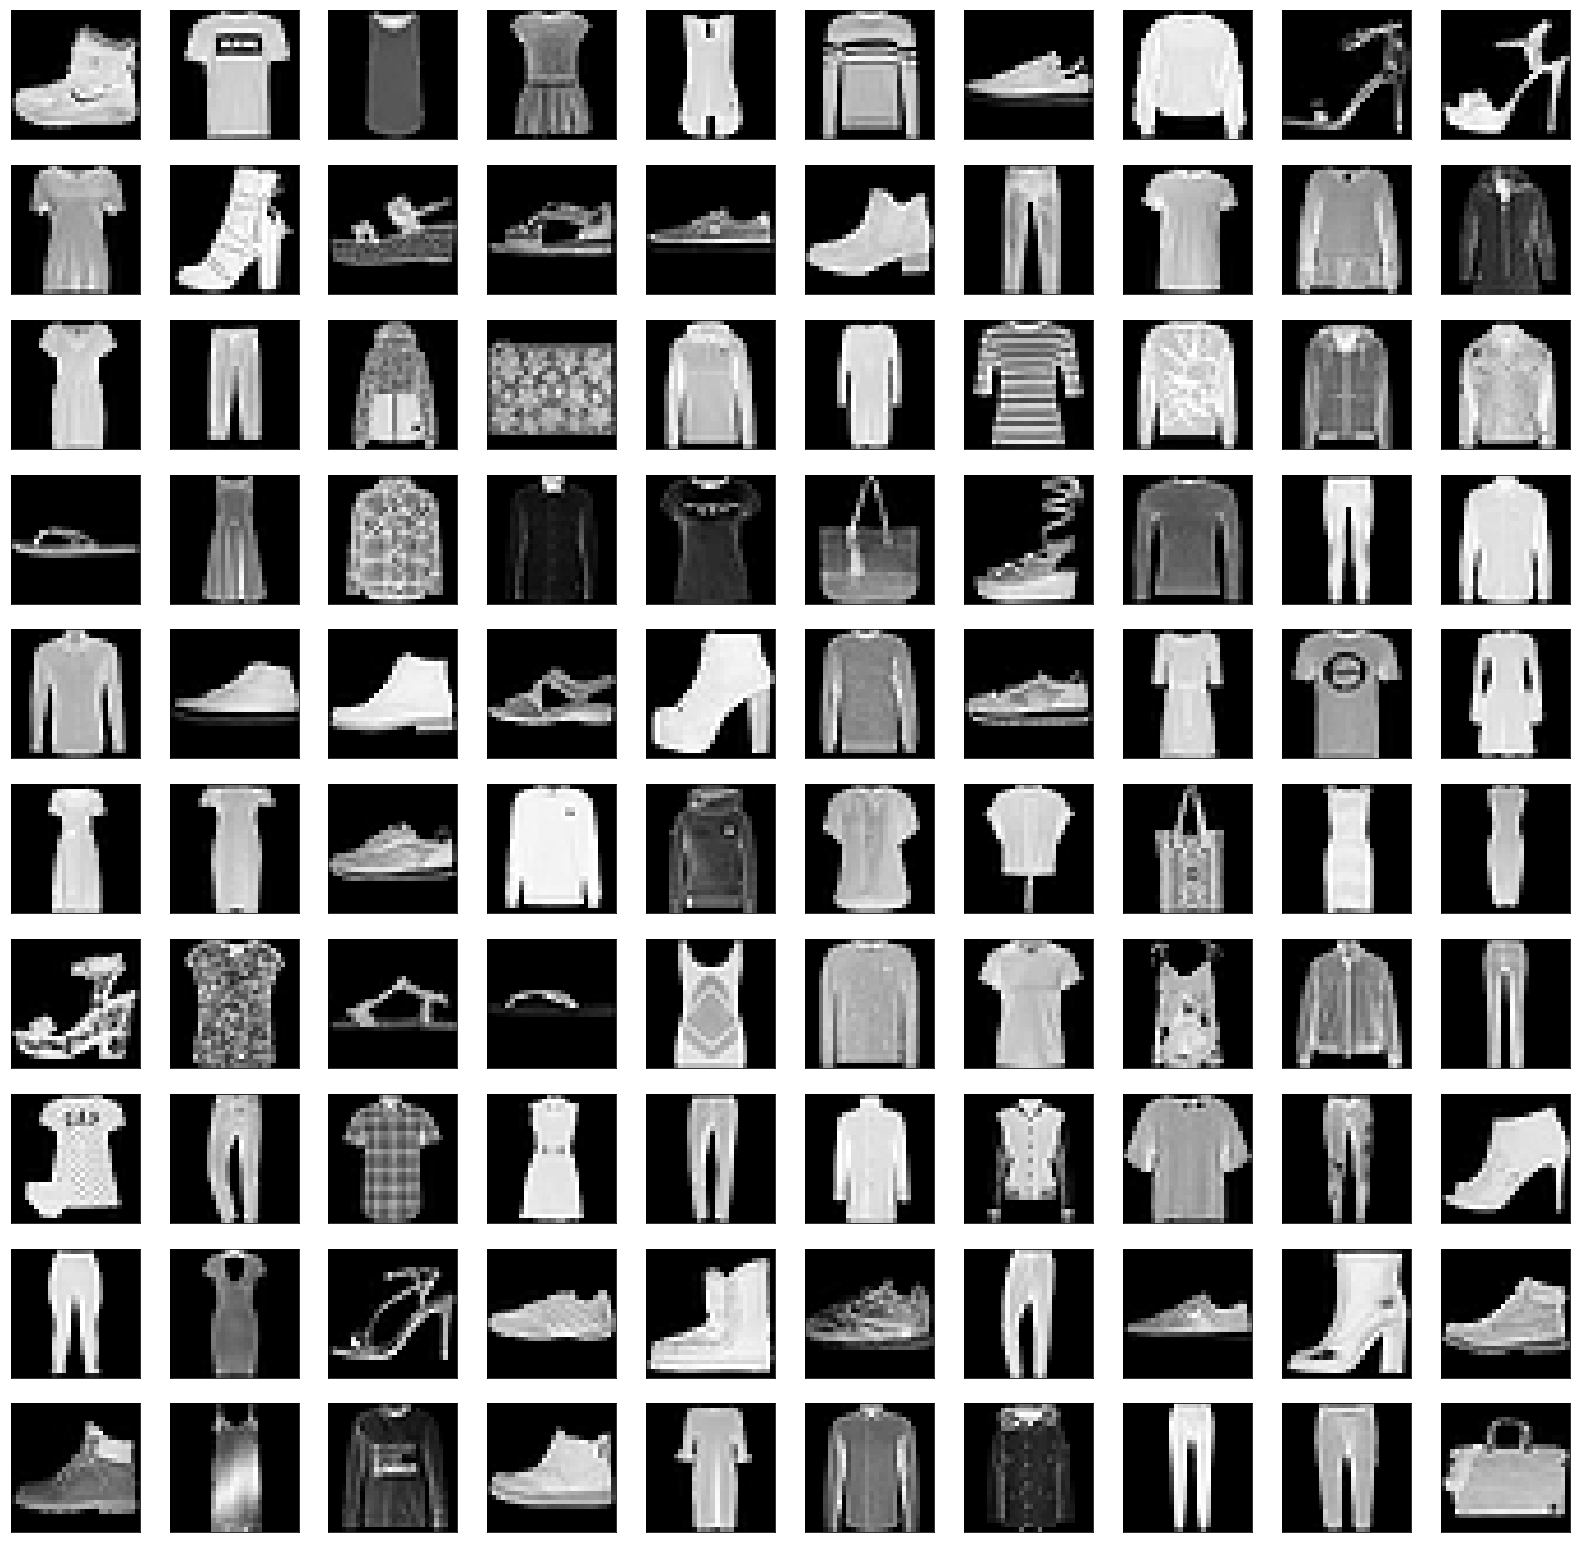

In [3]:
n_cols = 10
n_rows = 10
fig, axs = plt.subplots(n_rows, n_cols, figsize=(28,28))
for ax, pixels in zip(axs.flat, X_train):
    ax.imshow(pixels, cmap="gray")
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

入力をフラットな配列に変換し、学習データは10,000個、テストデータは1000個だけ利用します。また、元データでは濃淡が0から255までで表現されており、最大値が大きすぎるので、特徴の値の最大値を1としておきます。

In [4]:
# input image dimensions
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows * img_cols)[0:10000]
X_test = X_test.reshape(X_test.shape[0], img_rows * img_cols)[0:1000]

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

出力をone-hotに変換します。

In [5]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train)[0:10000]
Y_test = np_utils.to_categorical(y_test)[0:1000]

## 多層パーセプトロン (MLP)

準備

In [6]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import RMSprop

まず、中間層1層のモデルを設定します。ユニット数は入力の次元数を考えて、適切に設定してください。活性化関数は、パラメータ[activation](https://keras.io/ja/activations/)で指定します。

In [7]:
input_shape = X_train[0].shape
n_hidden = 200
n_out = len(Y_train[0])  # 10

model = Sequential()
model.add(Dense(n_hidden, input_shape=input_shape, activation='relu'))
model.add(Dense(n_out, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


損失関数 ([loss](https://keras.io/ja/losses/))、最適化アルゴリズム([optimizer](https://keras.io/ja/optimizers/))、評価基準([metrics](https://keras.io/ja/metrics/))を指定して、モデルをcompileします。

In [8]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(),
              metrics = ['accuracy'])

[fit](https://keras.io/ja/models/sequential/#fit)メソッドで学習します。繰り返し回数はパラメータepocksで、バッチサイズはパラメータbatch\_sizeで指定します。

In [9]:
model.fit(X_train, Y_train, epochs=10, batch_size=200)

Epoch 1/10
10000/10000 [==============================] - 0s 31us/step - loss: 0.9720 - acc: 0.6678
Epoch 2/10
10000/10000 [==============================] - 0s 20us/step - loss: 0.6363 - acc: 0.7754
Epoch 3/10
10000/10000 [==============================] - 0s 19us/step - loss: 0.5606 - acc: 0.7991
Epoch 4/10
10000/10000 [==============================] - 0s 19us/step - loss: 0.5085 - acc: 0.8189
Epoch 5/10
10000/10000 [==============================] - 0s 19us/step - loss: 0.4712 - acc: 0.8307
Epoch 6/10
10000/10000 [==============================] - 0s 19us/step - loss: 0.4456 - acc: 0.8409
Epoch 7/10
10000/10000 [==============================] - 0s 19us/step - loss: 0.4198 - acc: 0.8504
Epoch 8/10
10000/10000 [==============================] - 0s 19us/step - loss: 0.3960 - acc: 0.8583
Epoch 9/10
10000/10000 [==============================] - 0s 19us/step - loss: 0.3864 - acc: 0.8598
Epoch 10/10
10000/10000 [==============================] - 0s 18us/step - loss: 0.3643 - acc: 0.8699

[evaluate](https://keras.io/ja/models/sequential/#evaluate)メソッドで評価します。

In [10]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.435991247177124
Test accuracy: 0.857


### 中間層の層数を増やす

中間層の層数を増やしてみます。

In [11]:
model = Sequential()
af = 'relu'
model.add(Dense(n_hidden, input_shape=input_shape, activation=af))
model.add(Dense(n_hidden, activation=af))
model.add(Dense(n_hidden, activation=af))
model.add(Dense(n_hidden, activation=af))
model.add(Dense(n_hidden, activation=af))
model.add(Dense(n_out, activation='softmax'))

In [12]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(),
              metrics = ['accuracy'])
model.fit(X_train, Y_train, epochs=10, batch_size=200)
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
10000/10000 [==============================] - 0s 48us/step - loss: 1.0893 - acc: 0.5887
Epoch 2/10
10000/10000 [==============================] - 0s 31us/step - loss: 0.6807 - acc: 0.7421
Epoch 3/10
10000/10000 [==============================] - 0s 32us/step - loss: 0.5821 - acc: 0.7834
Epoch 4/10
10000/10000 [==============================] - 0s 32us/step - loss: 0.5105 - acc: 0.8101
Epoch 5/10
10000/10000 [==============================] - 0s 32us/step - loss: 0.4774 - acc: 0.8196
Epoch 6/10
10000/10000 [==============================] - 0s 31us/step - loss: 0.4267 - acc: 0.8409
Epoch 7/10
10000/10000 [==============================] - 0s 30us/step - loss: 0.3985 - acc: 0.8466
Epoch 8/10
10000/10000 [==============================] - 0s 33us/step - loss: 0.3880 - acc: 0.8534
Epoch 9/10
10000/10000 [==============================] - 0s 32us/step - loss: 0.3610 - acc: 0.8579
Epoch 10/10
10000/10000 [==============================] - 0s 32us/step - loss: 0.3580 - acc: 0.8680

dropoutを入れてみます。学習データとテストデータの正解率の差に注目してください。

In [13]:
from keras.layers.core import Dropout

model = Sequential()
af = 'relu'
model.add(Dense(n_hidden, input_shape=input_shape, activation=af))
model.add(Dropout(0.5))
model.add(Dense(n_hidden, activation=af))
model.add(Dropout(0.5))
model.add(Dense(n_hidden, activation=af))
model.add(Dropout(0.5))
model.add(Dense(n_hidden, activation=af))
model.add(Dropout(0.5))
model.add(Dense(n_hidden, activation=af))
model.add(Dropout(0.5))
model.add(Dense(n_out, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 200)               157000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 200)               40200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 200)               40200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 200)               40200     
__________

In [14]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(),
              metrics = ['accuracy'])
model.fit(X_train, Y_train, epochs=20, batch_size=100)
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
10000/10000 [==============================] - 1s 86us/step - loss: 1.9211 - acc: 0.2514
Epoch 2/20
10000/10000 [==============================] - 1s 59us/step - loss: 1.2756 - acc: 0.4823
Epoch 3/20
10000/10000 [==============================] - 1s 61us/step - loss: 1.0158 - acc: 0.5902
Epoch 4/20
10000/10000 [==============================] - 1s 61us/step - loss: 0.8968 - acc: 0.6457
Epoch 5/20
10000/10000 [==============================] - 1s 60us/step - loss: 0.8063 - acc: 0.6887
Epoch 6/20
10000/10000 [==============================] - 1s 60us/step - loss: 0.7462 - acc: 0.7122
Epoch 7/20
10000/10000 [==============================] - 1s 63us/step - loss: 0.7024 - acc: 0.7389
Epoch 8/20
10000/10000 [==============================] - 1s 60us/step - loss: 0.6812 - acc: 0.7531
Epoch 9/20
10000/10000 [==============================] - 1s 60us/step - loss: 0.6468 - acc: 0.7680
Epoch 10/20
10000/10000 [==============================] - 1s 61us/step - loss: 0.6399 - acc: 0.7742

CNNを使います。

In [15]:
# input image dimensions
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)[0:10000]
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)[0:1000]
input_shape = (img_rows, img_cols, 1)

n_out = len(Y_train[0])  # 10

model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(n_out, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               102528    
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total para

In [16]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(),
              metrics = ['accuracy'])
model.fit(X_train, Y_train, epochs=10, batch_size=200)
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
10000/10000 [==============================] - 3s 276us/step - loss: 1.1107 - acc: 0.6160
Epoch 2/10
10000/10000 [==============================] - 3s 269us/step - loss: 0.6944 - acc: 0.7380
Epoch 3/10
10000/10000 [==============================] - 3s 292us/step - loss: 0.5841 - acc: 0.7806
Epoch 4/10
10000/10000 [==============================] - 3s 288us/step - loss: 0.5226 - acc: 0.8046
Epoch 5/10
10000/10000 [==============================] - 3s 288us/step - loss: 0.4921 - acc: 0.8145
Epoch 6/10
10000/10000 [==============================] - 3s 287us/step - loss: 0.4558 - acc: 0.8349
Epoch 7/10
10000/10000 [==============================] - 3s 288us/step - loss: 0.4323 - acc: 0.8433
Epoch 8/10
10000/10000 [==============================] - 3s 288us/step - loss: 0.4092 - acc: 0.8537
Epoch 9/10
10000/10000 [==============================] - 3s 287us/step - loss: 0.3893 - acc: 0.8598
Epoch 10/10
10000/10000 [==============================] - 3s 289us/step - loss: 0.3757 - a